In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

import matplotlib.pyplot as plt

In [4]:
training_set = "./dataset/train.csv"
test_set = "./dataset/test.csv"

In [5]:
with open(training_set) as train:
    print(f"first line of train.csv \n{train.readline()}")
    print(f"second line of train.csv \n{train.readline()}")

first line of train.csv 
label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119

In [6]:
with open(test_set) as train:
    print(f"first line of test.csv \n{train.readline()}")
    print(f"second line of test.csv \n{train.readline()}")

first line of test.csv 
pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel1

In [7]:
def from_csv_nparray(csv_file, is_test=False):
    with open(csv_file) as file:
        reader = np.loadtxt(file, delimiter=',', skiprows=1)
        if is_test:
            images = reader.reshape((-1, 28, 28))
            return images
        labels = reader[:,0]
        images = reader[:, 1:].reshape((-1, 28, 28))

        return labels, images

In [8]:
Y, X = from_csv_nparray(training_set)

print(f"X shape : {X.shape}")
print(f"Y shape : {Y.shape}")

X shape : (42000, 28, 28)
Y shape : (42000,)


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, train_size=0.75, random_state=1, shuffle=True)

print(f"X train shape : {X_train.shape}")
print(f"Y train shape : {y_train.shape}")
print(f"X validation shape : {X_val.shape}")
print(f"Y validation shape : {y_val.shape}")

X train shape : (31500, 28, 28)
Y train shape : (31500,)
X validation shape : (10500, 28, 28)
Y validation shape : (10500,)


In [10]:
np.unique(Y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

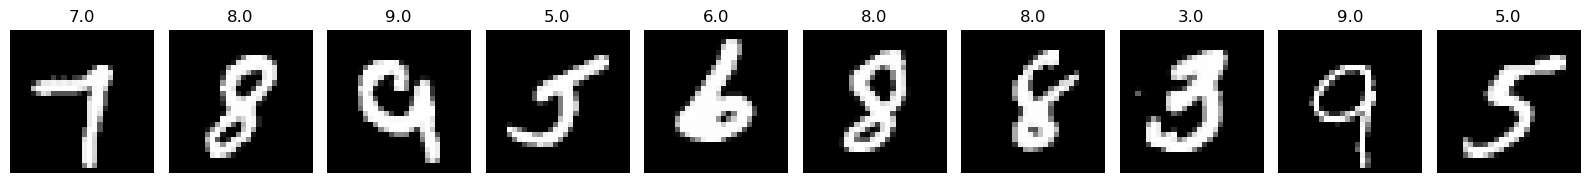

In [11]:
fig, axes = plt.subplots(1, 10, figsize=(16, 15))
axes = axes.flatten()

for i in range(10):
    img = X_train[i]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[i]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{y_train[i]}")
    ax.set_axis_off()

plt.tight_layout()
plt.show()

In [12]:
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   fill_mode='nearest')

train_generator = train_datagen.flow(x=X_train, y=y_train, batch_size=32)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow(x=X_val, y=y_val, batch_size=32)

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    # Conv2D(64, (5, 5), activation='relu'),
    # MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                        

In [15]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_batch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nAccuracy has reached 99.9%..Cancelling training")
            self.model.stop_training = True

In [16]:
callback = MyCallback()

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=callback)

Epoch 1/20
985/985 [==============================] - 24s 23ms/step - loss: 0.2260 - accuracy: 0.9304 - val_loss: 0.0794 - val_accuracy: 0.9740
Epoch 2/20
985/985 [==============================] - 27s 27ms/step - loss: 0.1044 - accuracy: 0.9684 - val_loss: 0.0581 - val_accuracy: 0.9838
Epoch 3/20
985/985 [==============================] - 25s 25ms/step - loss: 0.0852 - accuracy: 0.9746 - val_loss: 0.0469 - val_accuracy: 0.9876
Epoch 4/20
985/985 [==============================] - 25s 25ms/step - loss: 0.0792 - accuracy: 0.9767 - val_loss: 0.0508 - val_accuracy: 0.9859
Epoch 5/20
985/985 [==============================] - 26s 26ms/step - loss: 0.0672 - accuracy: 0.9797 - val_loss: 0.0896 - val_accuracy: 0.9770
Epoch 6/20
985/985 [==============================] - 25s 25ms/step - loss: 0.0640 - accuracy: 0.9807 - val_loss: 0.1013 - val_accuracy: 0.9705
Epoch 7/20
985/985 [==============================] - 25s 25ms/step - loss: 0.0601 - accuracy: 0.9831 - val_loss: 0.0489 - val_accuracy:

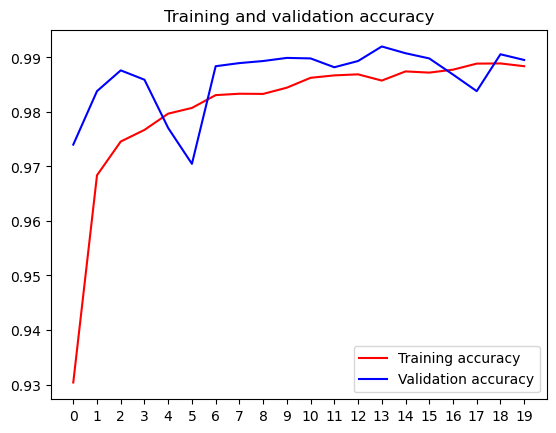

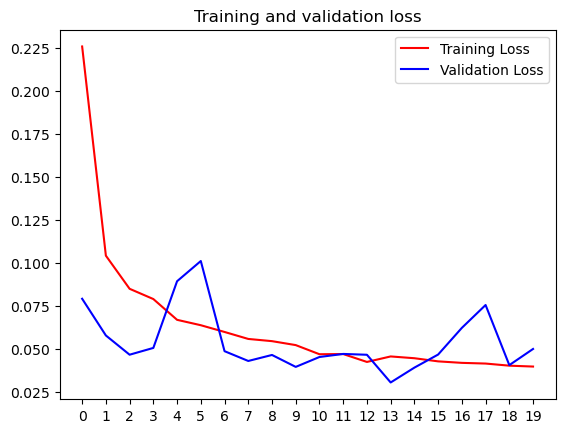

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = history.epoch

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xticks(epochs)
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xticks(epochs)
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
test_images = from_csv_nparray(test_set, True)
test_images = np.expand_dims(test_images, axis=-1)
predections = model.predict(test_images)
predections = np.argmax(predections, axis=1)
predections

875/875 [==============================] - 4s 4ms/step


array([2, 0, 2, ..., 3, 0, 2], dtype=int64)

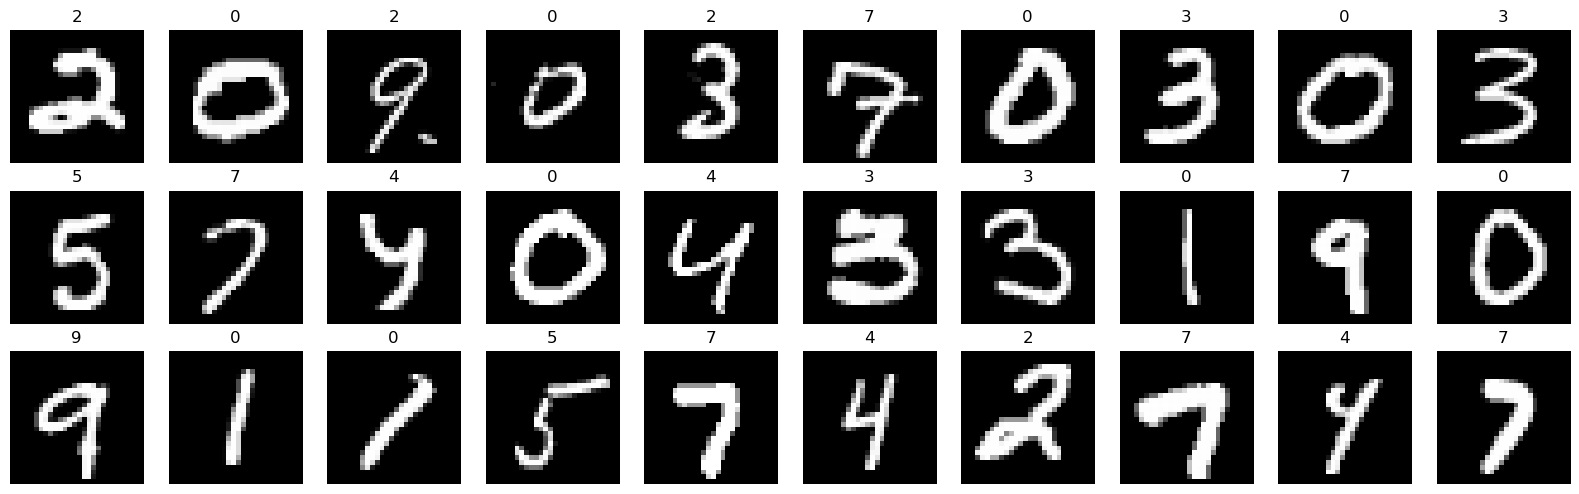

In [23]:
fig, axes = plt.subplots(3, 10, figsize=(16, 5))
axes = axes.flatten()

for i in range(30):
    img = test_images[i]
    img = array_to_img(img)
    ax = axes[i]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{predections[i]}")
    ax.set_axis_off()

plt.tight_layout()
plt.show()

In [28]:
submission = pd.DataFrame(data={'ImageId': np.arange(1, len(predections) + 1),'Label': predections})
submission.to_csv('./submissions/submission.csv', index=False)